In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
etc_data = pd.read_excel('./108年國道(A1A2A3)事故資料.xlsx') #  讀取excel檔

In [3]:
etc_data.head()

,發生日期,發生時間,事故類別名稱,發生縣市名稱,發生市區鄉鎮名稱,發生-路線-公路名稱(國道/省道/縣道/鄉道),發生-路線-公里 (國道/省道/縣道/鄉道),發生-路線-公尺(國道/省道/縣道/鄉道),發生-路線-向車道(國道/省道/縣道/鄉道),24小時內死亡人數,...,道路障礙-視距代碼,號誌-號誌種類代碼,號誌-號誌動作代碼,車道劃分設施-分向設施子類別代碼,車道劃分設施-分道設施-快車道或一般車道間代碼,車道劃分設施-分道設施-快慢車道間代碼,車道劃分設施-分道設施-路面邊線代碼,事故類型及型態子類別代碼,肇因研判子類別代碼-主要,當事者區分(類別)子類別代碼(車種)
0,2019-01-25,145627,A1,臺中市,外埔區,國道3號,167.0,700.0,南,1,...,7,4,4,1,3,5,1,13,16,B03
1,2019-01-12,141900,A1,新北市,新店區,國道3號,29.0,100.0,南,1,...,7,4,4,1,3,5,1,20,7,B03
2,2019-12-10,34800,A1,桃園市,蘆竹區,國道1號,44.0,900.0,北,2,...,7,4,4,1,3,5,1,13,23,A31
3,2019-12-25,122735,A1,桃園市,桃園區,國道1號,53.0,0.0,北,1,...,7,4,4,1,3,5,1,12,7,A31
4,2019-12-11,25000,A1,新竹縣,湖口鄉,國道1號,81.0,400.0,北,1,...,7,4,4,1,3,5,1,13,39,A21


In [4]:
a = pd.DataFrame()
a['發生時間'] = etc_data[' 發生時間']
a['事故類別'] = etc_data[' 事故類別名稱']
a['發生日期'] = etc_data[' 發生日期']
a

,發生時間,事故類別,發生日期
0,145627,A1,2019-01-25
1,141900,A1,2019-01-12
2,34800,A1,2019-12-10
3,122735,A1,2019-12-25
4,25000,A1,2019-12-11
...,...,...,...
31213,175559,A3,2019-05-24
31214,144548,A3,2019-05-24
31215,174041,A3,2019-05-24
31216,161437,A3,2019-05-24


In [5]:
a_dict = {'1':'01~02','2':'02~03','3':'03~04','4':'04~05','5':'05~06','6':'06~07','7':'07~08','8':'08~09','9':'09~10','10':'10~11',
          '11':'11~12','12':'12~13','13':'13~14','14':'14~15','15':'15~16','16':'16~17','17':'17~18','18':'18~19','19':'19~20','20':'20~21',
         '21':'21~22','22':'22~23','23':'23~00'}
new_time = []

def time_tf(x):
    x = str(x)
    if (len(x)) == 5 :
        x = a_dict[x[0]]
        new_time.append(x)
    elif (len(x)) == 6 : 
        x = a_dict[x[0:2]] 
        new_time.append(x)
    else :
        x = '00~01'
        new_time.append(x)
        
        
for x in a['發生時間']:
    time_tf(x)

In [6]:
a['new_time'] = new_time

In [7]:
a

,發生時間,事故類別,發生日期,new_time
0,145627,A1,2019-01-25,14~15
1,141900,A1,2019-01-12,14~15
2,34800,A1,2019-12-10,03~04
3,122735,A1,2019-12-25,12~13
4,25000,A1,2019-12-11,02~03
...,...,...,...,...
31213,175559,A3,2019-05-24,17~18
31214,144548,A3,2019-05-24,14~15
31215,174041,A3,2019-05-24,17~18
31216,161437,A3,2019-05-24,16~17


In [8]:
time_aly = pd.DataFrame()
time_aly['time'] = a['new_time'].groupby(a['new_time']).count().sort_values( ascending = True ).index
time_aly['frq'] =a['new_time'].groupby(a['new_time']).count().sort_values( ascending = True ).values
time_aly

,time,frq
0,02~03,190
1,03~04,191
2,01~02,209
3,04~05,218
4,05~06,246
5,00~01,257
6,23~00,350
7,06~07,374
8,22~23,565
9,21~22,757


In [9]:
tt = ['00~01','01~02','02~03','03~04','04~05','05~06','06~07','07~08','08~09','09~10',
     '10~11','11~12','12~13','13~14','14~15','15~16','16~17','17~18','18~19','19~20',
     '20~21','21~22','22~23','23~00']
time_aly_1 = pd.DataFrame()
time_aly_1['time'] = tt

In [10]:
time_aly_1 = pd.merge(time_aly_1,time_aly, on='time')
time_aly_1

,time,frq
0,00~01,257
1,01~02,209
2,02~03,190
3,03~04,191
4,04~05,218
5,05~06,246
6,06~07,374
7,07~08,1670
8,08~09,2055
9,09~10,1901


In [11]:
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
plt.rcParams['font.size'] = 20 

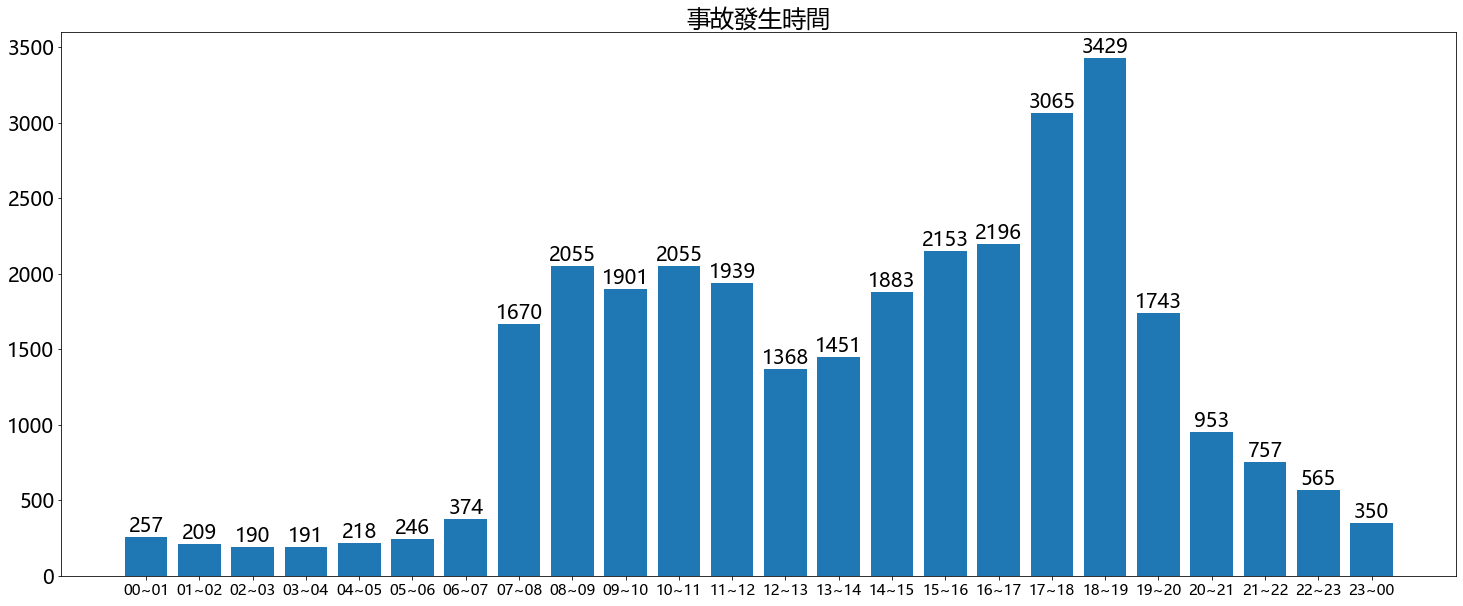

In [12]:
plt.rcParams["figure.figsize"] = (25, 10)
bar = plt.bar(time_aly_1['time'], time_aly_1['frq'])
plt.xticks(fontsize=15)

plt.title("事故發生時間")

# 顯示數值
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0 , height, '%d' % int(height), ha='center', va='bottom')


In [13]:
a

,發生時間,事故類別,發生日期,new_time
0,145627,A1,2019-01-25,14~15
1,141900,A1,2019-01-12,14~15
2,34800,A1,2019-12-10,03~04
3,122735,A1,2019-12-25,12~13
4,25000,A1,2019-12-11,02~03
...,...,...,...,...
31213,175559,A3,2019-05-24,17~18
31214,144548,A3,2019-05-24,14~15
31215,174041,A3,2019-05-24,17~18
31216,161437,A3,2019-05-24,16~17


In [14]:
a['weekday'] = a['發生日期'] .apply(lambda x : x.strftime('%w'))

In [15]:
a['weekday'].unique()

array(['5', '6', '2', '3', '1', '0', '4'], dtype=object)

In [16]:
a['weekday']

0        5
1        6
2        2
3        3
4        3
        ..
31213    5
31214    5
31215    5
31216    5
31217    5
Name: weekday, Length: 31218, dtype: object

In [17]:
wd = {'0':'星期日','1':'星期一','2':'星期二','3':'星期三','4':'星期四','5':'星期五','6':'星期六'}

In [18]:
a['weekday'] = a['weekday'].apply(lambda x : wd[x])

In [19]:
a['weekday'] 

0        星期五
1        星期六
2        星期二
3        星期三
4        星期三
        ... 
31213    星期五
31214    星期五
31215    星期五
31216    星期五
31217    星期五
Name: weekday, Length: 31218, dtype: object

In [20]:
a

,發生時間,事故類別,發生日期,new_time,weekday
0,145627,A1,2019-01-25,14~15,星期五
1,141900,A1,2019-01-12,14~15,星期六
2,34800,A1,2019-12-10,03~04,星期二
3,122735,A1,2019-12-25,12~13,星期三
4,25000,A1,2019-12-11,02~03,星期三
...,...,...,...,...,...
31213,175559,A3,2019-05-24,17~18,星期五
31214,144548,A3,2019-05-24,14~15,星期五
31215,174041,A3,2019-05-24,17~18,星期五
31216,161437,A3,2019-05-24,16~17,星期五


In [21]:
wd_aly = pd.DataFrame()
wd_aly['wd'] = a['weekday'].groupby(a['weekday']).count().sort_values( ascending = False ).index
wd_aly['wf'] =a['weekday'].groupby(a['weekday']).count().sort_values( ascending = False ).values
wd_aly

,wd,wf
0,星期五,5568
1,星期六,4649
2,星期日,4325
3,星期三,4307
4,星期四,4251
5,星期二,4093
6,星期一,4025


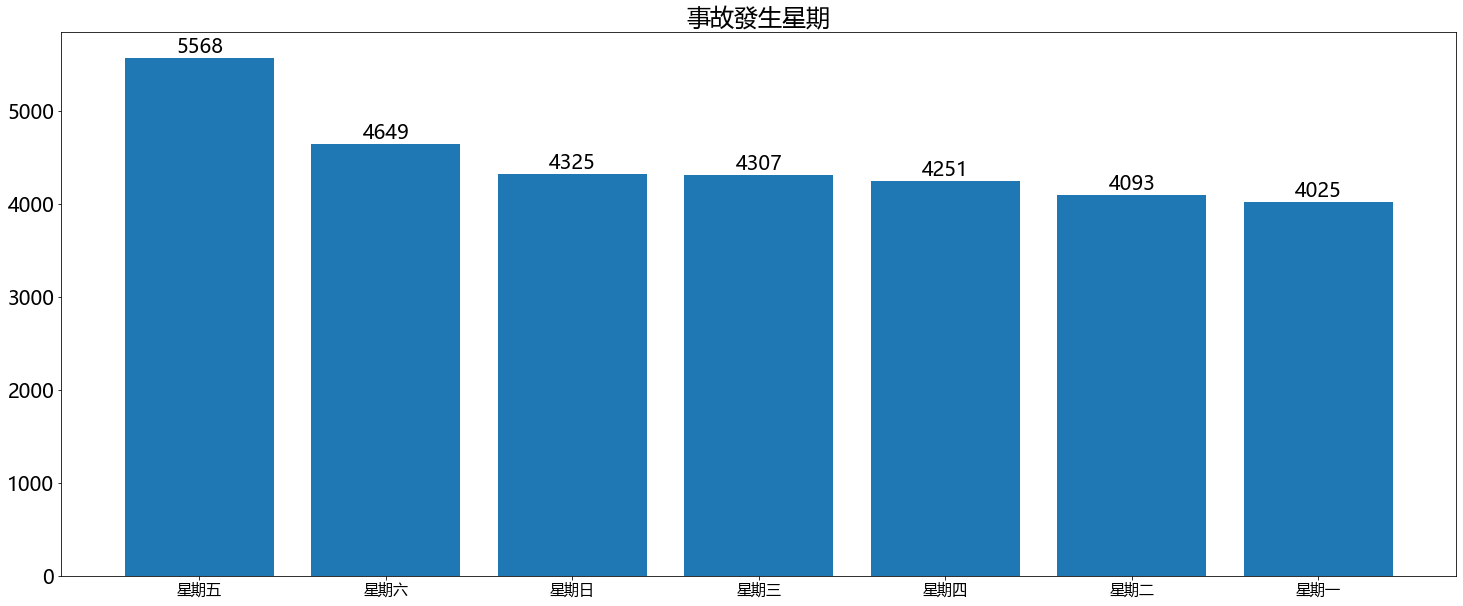

In [22]:
plt.rcParams["figure.figsize"] = (25, 10)
bar = plt.bar(wd_aly['wd'],wd_aly['wf'])
plt.xticks(fontsize=15)

plt.title("事故發生星期")

# 顯示數值
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0 , height, '%d' % int(height), ha='center', va='bottom')

In [23]:
ddd = ['2019-01-01','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-07','2019-02-08','2019-02-09','2019-02-10'
       ,'2019-02-28','2019-03-01','2019-03-02','2019-03-03','2019-04-04','2019-04-05','2019-04-06','2019-04-07','2019-05-01','2019-06-07'
       ,'2019-06-08','2019-06-09','2019-09-13','2019-09-14','2019-09-15','2019-10-10','2019-10-11','2019-10-12','2019-10-13']

In [26]:
vad = []
for line in a['發生日期'] :
    line = str(line)[:10]
    if line in ddd :
        line = '連假'
    else:
        line = 'nor'
    vad.append(line)

print(set(vad))

{'nor', '連假'}


In [27]:
a['vad'] = vad

In [33]:
vad_filter = a['vad'] == '連假'
a[vad_filter]

,發生時間,事故類別,發生日期,new_time,weekday,vad
43,43040,A1,2019-04-07,04~05,星期日,連假
71,100144,A1,2019-06-09,10~11,星期日,連假
99,134700,A2,2019-01-01,13~14,星期二,連假
131,175854,A2,2019-01-01,17~18,星期二,連假
321,55702,A2,2019-01-01,05~06,星期二,連假
...,...,...,...,...,...,...
31096,171700,A3,2019-06-09,17~18,星期日,連假
31098,85700,A3,2019-06-07,08~09,星期五,連假
31100,81041,A3,2019-06-07,08~09,星期五,連假
31101,2040,A3,2019-06-07,00~01,星期五,連假


In [37]:
print(len(a[vad_filter])) # 連假事故數
print(len(ddd)) # 連假天數

2774
29


In [38]:
print(len(a)) # 2019 總事故數

31218


In [40]:
# 連假外發生事故數 (次數/天)
x = (31218-2774)/(365-29) 
x

84.6547619047619

In [44]:
# 平均連假發生事故數(次數/天)
y = 2774/29 
y  

95.65517241379311

In [51]:
e1 = a['weekday'] == '星期五'
e2 = a['weekday'] == '星期六'
e3 = a['weekday'] == '星期日'
filter_a = a[(vad_filter|e1|e2|e3)]
filter_a

,發生時間,事故類別,發生日期,new_time,weekday,vad
0,145627,A1,2019-01-25,14~15,星期五,nor
1,141900,A1,2019-01-12,14~15,星期六,nor
9,23300,A1,2019-01-13,02~03,星期日,nor
11,52600,A1,2019-01-11,05~06,星期五,nor
12,25200,A1,2019-01-27,02~03,星期日,nor
...,...,...,...,...,...,...
31213,175559,A3,2019-05-24,17~18,星期五,nor
31214,144548,A3,2019-05-24,14~15,星期五,nor
31215,174041,A3,2019-05-24,17~18,星期五,nor
31216,161437,A3,2019-05-24,16~17,星期五,nor


In [52]:
print(len(filter_a))  # 連假 or 假日 (五、六、日) 發生事故數

15520


In [50]:
len(filter_a['發生日期'].unique())  # 連假 or 假日天數

165

In [54]:
# 連假 or 假日發生事故數 (次數/天)
z = 15520 / 165
z

94.06060606060606

In [55]:
# 平常日發生事故數 (次數/天)
l = (31218-15520) / (365-165)
l

78.49